In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_f1_score
from sklearn_crfsuite.metrics import flat_classification_report

In [2]:
df = pd.read_excel('Tokenization2.xlsx')
df.head(30)

,Patient ID,word,label,Gazetteers
0,1.0,আমার,O,N
1,1.0,তিন,V,N
2,1.0,দিন,T,N
3,1.0,যাবত,O,N
4,1.0,অনেক,A,N
5,1.0,মাথা,Bp,Y
6,1.0,ব্যথা,S,Y
7,2.0,আমার,O,N
8,2.0,প্রায়,A,N
9,2.0,এক,V,N


In [3]:
df['Patient ID'][0]


1.0

In [4]:
a=1
k=0
for i in df['Patient ID']:
    if i == a:
        df['Patient ID'][k] = "patient:"+str(a)
        a=a+1
        k=k+1
    else:
        df['Patient ID'][k] = np.NAN
        k=k+1
        
df.head(30)        
        
        
        

<ipython-input-4-debcd2ccb115>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Patient ID'][k] = "patient:"+str(a)
C:\Users\tanvi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Patient ID,word,label,Gazetteers
0,patient:1,আমার,O,N
1,NaN,তিন,V,N
2,NaN,দিন,T,N
3,NaN,যাবত,O,N
4,NaN,অনেক,A,N
5,NaN,মাথা,Bp,Y
6,NaN,ব্যথা,S,Y
7,patient:2,আমার,O,N
8,NaN,প্রায়,A,N
9,NaN,এক,V,N


In [5]:
df.set_index(["Patient ID", "label"]).count(level="label")

,word,Gazetteers
label,,
A,590,391
Bl,31,25
Bp,503,361
C,66,41
D,20,16
E,78,46
F,74,55
O,4077,2749
S,945,655


In [6]:
df.describe()

,Patient ID,word,label,Gazetteers
count,352,6519,6518,4431
unique,352,792,11,2
top,patient:102,আমার,O,N
freq,1,420,4077,3384


In [7]:
df=df.dropna(subset=['label'])
df = df.fillna(method = 'ffill')
df['label'].unique()

array(['O', 'V', 'T', 'A', 'Bp', 'S', 'D', 'C', 'F', 'Bl', 'E'],
      dtype=object)

In [8]:
df = df.applymap(str)

In [9]:
df.head(30)

,Patient ID,word,label,Gazetteers
0,patient:1,আমার,O,N
1,patient:1,তিন,V,N
2,patient:1,দিন,T,N
3,patient:1,যাবত,O,N
4,patient:1,অনেক,A,N
5,patient:1,মাথা,Bp,Y
6,patient:1,ব্যথা,S,Y
7,patient:2,আমার,O,N
8,patient:2,প্রায়,A,N
9,patient:2,এক,V,N


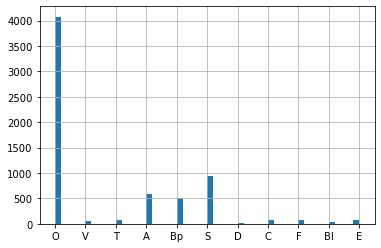

In [10]:
df['label'].hist(bins=50)

In [11]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w,t) for w, t in zip(s['word'].values.tolist(),
                                                       s['label'].values.tolist())]
        self.grouped = self.df.groupby("Patient ID").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['patient:{}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

In [12]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[2]


'আমার  স্তন এর নিপল দিয়ে  দুধ এর মত  সাদা  রস  বের  হতে  থাকে  কিন্তু  আমি  প্রেগন্যান্ট  না'

In [13]:
sent = getter.get_text()
print(sent)

[('আমার ', 'O'), ('তিন', 'V'), ('দিন', 'T'), ('যাবত', 'O'), ('অনেক', 'A'), ('মাথা', 'Bp'), ('ব্যথা', 'S')]


In [14]:
sentences = getter.sentences

In [15]:
def word2features(sent, i):
    word = sent[i][0]

    features = {
        'bias': 1.0,
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    
    }
    if i > 0:
        word1 = sent[i-1][0]
        
        features.update({
            '-1:word.istitle()': word1.istitle(),
        })
    else:
        features['BOS'] = True
    if i < len(sent)-1:
        word1 = sent[i+1][0]
       
        features.update({
            
            '+1:word.istitle()': word1.istitle(),
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token, label in sent]

In [24]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]
z= [sent2tokens(s) for s in sentences]
print(z)

[['আমার ', 'তিন', 'দিন', 'যাবত', 'অনেক', 'মাথা', 'ব্যথা'], ['আমার  ', 'অনেক', 'ব্রণ ', 'হয় ', 'মুখ', 'এ', 'আর ', 'অনেক ', 'ব্যথা ', 'করে'], ['আমার ', 'স্তন', 'এর', 'নিপল', 'দিয়ে ', 'দুধ', 'এর', 'মত ', 'সাদা ', 'রস ', 'বের ', 'হতে ', 'থাকে ', 'কিন্তু ', 'আমি ', 'প্রেগন্যান্ট ', 'না'], ['আমার ', 'বাবা', 'এর', 'রাত', 'এ', 'ঠিকমত ', 'ঘুম ', 'হয় ', 'না', 'হঠাৎ ', 'হঠাৎ ', 'লাফ ', 'দিয়ে ', 'উঠে ', 'পর', 'এ'], ['আমি ', 'অতিরিক্ত ', 'টেনশন ', 'করলে ', 'ঘুম ', 'ঠিকমত ', 'হয় ', 'না ', 'অনেক ', 'বেশি ', 'অস্থির', 'তা', 'কাজ ', 'করে'], ['আমার ', 'ঠিকমত ', 'ঘুম ', 'হয় ', 'না ', 'আবার ', 'রাত', 'এ', 'একটু ', 'পর', 'পর', 'ই', 'ঘুম ', 'ভেঙ্গে ', 'যায় ', 'এরপর ', 'ঘুম ', 'আসে', 'ও', 'না'], ['আমি ', 'কাজ', 'এ', 'ঠিকমত ', 'মনোযোগ ', 'দিতে ', 'পারি ', 'না', 'ঘুম ', 'ঠিকমত ', 'হয় ', 'না ', 'খুব ', 'তারাতারি ', 'ভুলে ', 'যাই'], ['আমার ', 'ছেলে', 'এর', 'গত ', 'সাত ', 'দিন ', 'যাবত ', 'অনেক ', 'জ্বর', 'খাবার', 'এর', 'স্বাদ ', 'তিতা ', 'লাগে'], ['আমার ', 'মাথা ', 'প্রচন্ড ', 'ব্যথা', 'জ্বর ', 'প্রায় ', '102',

In [17]:
print(X[0:1])

[[{'bias': 1.0, 'word[-3:]': 'ার ', 'word[-2:]': 'র ', 'word.istitle()': False, 'word.isdigit()': False, 'BOS': True, '+1:word.istitle()': False}, {'bias': 1.0, 'word[-3:]': 'তিন', 'word[-2:]': 'িন', 'word.istitle()': False, 'word.isdigit()': False, '-1:word.istitle()': False, '+1:word.istitle()': False}, {'bias': 1.0, 'word[-3:]': 'দিন', 'word[-2:]': 'িন', 'word.istitle()': False, 'word.isdigit()': False, '-1:word.istitle()': False, '+1:word.istitle()': False}, {'bias': 1.0, 'word[-3:]': 'াবত', 'word[-2:]': 'বত', 'word.istitle()': False, 'word.isdigit()': False, '-1:word.istitle()': False, '+1:word.istitle()': False}, {'bias': 1.0, 'word[-3:]': 'নেক', 'word[-2:]': 'েক', 'word.istitle()': False, 'word.isdigit()': False, '-1:word.istitle()': False, '+1:word.istitle()': False}, {'bias': 1.0, 'word[-3:]': 'াথা', 'word[-2:]': 'থা', 'word.istitle()': False, 'word.isdigit()': False, '-1:word.istitle()': False, '+1:word.istitle()': False}, {'bias': 1.0, 'word[-3:]': 'যথা', 'word[-2:]': 'থা', 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
np.array(y_train).shape

(316,)

In [19]:
crf = CRF(algorithm = 'lbfgs',
         c1 = 0.1,
         c2 = 0.1,
         max_iterations = 100,
         all_possible_transitions = False)
crf.fit(X_train, y_train)

C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

In [20]:
y_pred = crf.predict(X_test)

In [21]:
f1_score = flat_f1_score(y_test, y_pred, average = 'weighted')
print(f1_score)

0.8950082389053244


In [22]:
report = flat_classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           A       0.93      0.95      0.94        43
          Bl       1.00      0.25      0.40         4
          Bp       0.92      0.79      0.85        42
           C       1.00      0.60      0.75         5
           D       0.00      0.00      0.00         1
           E       1.00      1.00      1.00         9
           F       1.00      1.00      1.00         6
           O       0.92      0.98      0.95       285
           S       0.78      0.72      0.75        68
           T       0.80      0.57      0.67         7
           V       0.50      0.50      0.50         2

    accuracy                           0.90       472
   macro avg       0.80      0.67      0.71       472
weighted avg       0.90      0.90      0.90       472



C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn import svm
model62=svm.SVC(kernel='rbf',C=,gamma=1)
model62.fit(X_train,y_train)

SyntaxError: invalid syntax (<ipython-input-23-097b89963623>, line 2)